# Differential photometry

천체 관측 중 CCD(charge couple device) 관측 자료를 이용하여 구경 측광을 수행하는 방법을 다룹니다.

## 데이터 저장

### 데이터 저장 폴더 생성

데이터를 저장할 폴더를 "GSHS_Photometry" 라는 이름으로 생성해 보겠습니다.

* 만약 리눅스 시스템 이라면 shell 명령어로 가능한데, "!"를 붙이면 shell 명령어를 실행할 수 있습니다.
> !mkdir GSHS_Photometry

아래 코드를 실행하면 OS의 영향을 받지 않기 위하여 pathlib을 사용하여 폴더를 생성할 수 있습니다.

In [1]:
import os
from pathlib import Path
BASEPATH = Path("./")
save_dir_name = "GSHS_Photometry"
print(f"BASEPATH: {BASEPATH}")

if not (BASEPATH/save_dir_name).exists():
    os.mkdir(str(BASEPATH/save_dir_name))
    print (f"{str(BASEPATH/save_dir_name)} is created...")
else :
    print (f"{str(BASEPATH/save_dir_name)} is already exist...")

BASEPATH: .
GSHS_Photometry is already exist...


### FITS 파일 다운로드

나의 구글 드라이브에 저장된 CCD 관측 파일을 다운받아 보겠습니다.

GNU Wget은 HTTP 통신 또는 FTP 통신을 사용해 서버에서 파일 또는 콘텐츠를 다운로드할 때 사용하는 소프트웨어입니다. Wget의 특징은 여러 파일을 한 번에 다운로드하거나 웹 페이지의 링크를 순회하며 여러 콘텐츠를 자동으로 다운로드할 때 매우 편리합니다.

MS Windows에서는 별도로 설치를 해줘야 하며,
구글 코랩도 wget을을 지원해주니 아래 셀을 실행하면 자신의 [작업 영역]에 저장된다. 하지만 이 파일은 이 런타임이 재실행 될때는 삭제됨에 유의하시기 바랍니다.

아래 코드를 실행하면 여러분의 작업영역에 해당 파일을 저장해 줄 것입니다.



In [2]:
fname = "TrES-4b_LIGHT_R_2024-06-13-15-09-52_120sec_GSON300_STF-8300M_-10c_1bin.fit"
fid = "19Y2TMjSFUgldAWiXftpHHcFZ7N92ebhP"

# wget을 이용(나의 구글드라이브에서 공유한 파일을 사용할 경우)
!wget --no-check-certificate "https://docs.google.com/uc?export=download&id={fid}" -O {save_dir_name}/{fname}


--2024-12-21 19:10:46--  https://docs.google.com/uc?export=download&id=19Y2TMjSFUgldAWiXftpHHcFZ7N92ebhP
Resolving docs.google.com (docs.google.com)... 142.250.206.206, 2404:6800:400a:813::200e
Connecting to docs.google.com (docs.google.com)|142.250.206.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=19Y2TMjSFUgldAWiXftpHHcFZ7N92ebhP&export=download [following]
--2024-12-21 19:10:47--  https://drive.usercontent.google.com/download?id=19Y2TMjSFUgldAWiXftpHHcFZ7N92ebhP&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.206.193, 2404:6800:400a:813::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.206.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33958080 (32M) [application/octet-stream]
Saving to: ‘GSHS_Photometry/TrES-4b_LIGHT_R_2024-06-13-15-09-52_120sec_GSON300_STF-8300M_-10c_1bin.fit’

### 데이터 확인

* 코랩을 사용할 경우에는 오른쪽의 [파일]창에서 확인할 수 있습니다.
* linux shell 명령어로 다음과 같이 확인해 볼 수 있습니다.
> !ls -l apert_photometry

OS의 영향을 받지 않고 파이썬으로 확인하는 방법은 아래와 같이 하면 됩니다.

In [3]:
fpaths = sorted(list((BASEPATH/save_dir_name).glob('*.fit*')))
print(f"fpaths: {fpaths}")
print(f"len(fpaths): {len(fpaths)}")

fpaths: [PosixPath('GSHS_Photometry/241GERMANIA_LIGHT_R_2023-11-07-18-38-15_150sec_GSON300_STF-8300M_-19c_1bin.fit'), PosixPath('GSHS_Photometry/46P-WIRTANEN_LIGHT_R_2018-12-13-17-46-15_60sec_FSQ106ED-x73_QSI683ws_-30c_2bin.fit'), PosixPath('GSHS_Photometry/IC2167_LIGHT_L_2023-03-18-13-02-59_600sec_SVX80T-x80_QSI683ws_-20c_1bin.fits'), PosixPath('GSHS_Photometry/IC434_Light_H_2019-10-08-09-38-54_900sec_GSON300_QSI683ws_-15C_1bin.fit'), PosixPath('GSHS_Photometry/M13_Light_L_2021-06-04-13-10-16_090sec_TEC140x75_STL-11000M_-19C_1bin.fit'), PosixPath('GSHS_Photometry/NGC6992_LIGHT_L_2023-06-23-15-37-09_600sec_SVX80T-x80_QSI683ws_-20c_1bin.fits'), PosixPath('GSHS_Photometry/TrES-4b_LIGHT_R_2024-06-13-15-09-52_120sec_GSON300_STF-8300M_-10c_1bin.fit')]
len(fpaths): 7


##  FITS handling

### Load files

fits file을  읽어 확인해 보겠습니다.

In [4]:
from astropy.io import fits
import ysfitsutilpy as yfu
fpath = Path(fpaths[0])

hdul = fits.open(fpath, unit="adu")
ccd = yfu.load_ccd(fpath)
flt = hdul[0].header["filter"]

print("type(hdul) :", type(hdul))
print("type(hdul[0]) :", type(hdul[0]))

type(hdul) : <class 'astropy.io.fits.hdu.hdulist.HDUList'>
type(hdul[0]) : <class 'astropy.io.fits.hdu.image.PrimaryHDU'>


Set MJD-AVG to 60255.777436 from DATE-AVG'. [astropy.wcs.wcs]


### header

hdul 이라는 이름에 HDUList들이 리스트 형태로 들어 있습니다. 각각의 hdulist는 2차원 이므로 index는 [0]번만 존재합니다.

In [5]:
print("type(hdul[0].hedaer) :", type(hdul[0].header))
hdul[0].header

type(hdul[0].hedaer) : <class 'astropy.io.fits.header.Header'>


SIMPLE  =                    T / C# FITS                                        
BITPIX  =                   16                                                  
NAXIS   =                    2 / Dimensionality                                 
NAXIS1  =                 3352                                                  
NAXIS2  =                 2532                                                  
EXTEND  =                    T / Extensions are permitted                       
BZERO   =                32768                                                  
IMAGETYP= 'LIGHT'              / Type of exposure                               
EXPOSURE=                150.0 / [s] Exposure duration                          
EXPTIME =                150.0 / [s] Exposure duration                          
DATE-LOC= '2023-11-08T03:38:15.165' / Time of observation (local)               
DATE-OBS= '2023-11-07T18:38:15.165' / Time of observation (UTC)                 
DATE-AVG= '2023-11-07T18:39:

header는 key와 value가 들어 있습니다.

In [6]:
print("hdul[0].hedaer['DATE-OBS'] :", hdul[0].header['DATE-OBS'])
print("type(hdul[0].hedaer['DATE-OBS']) :", type(hdul[0].header['DATE-OBS']))

hdul[0].hedaer['DATE-OBS'] : 2023-11-07T18:38:15.165
type(hdul[0].hedaer['DATE-OBS']) : <class 'str'>


### data

관측 자료는 numpy.ndarray 형태로 들어 있음을 알 수 있습니다.

In [7]:
print("type(hdul[0].data) :", type(hdul[0].data))
print("hdul[0].data.dtype :", hdul[0].data.dtype)
print("hdul[0].data.shape :", hdul[0].data.shape)
print("hdul[0].data :", hdul[0].data)

type(hdul[0].data) : <class 'numpy.ndarray'>
hdul[0].data.dtype : uint16
hdul[0].data.shape : (2532, 3352)
hdul[0].data : [[5860 5936 6088 ... 6071 5860 5829]
 [5787 6202 6235 ... 5992 6024 5822]
 [5882 6058 6419 ... 5900 6181 5803]
 ...
 [5799 6321 6164 ... 6263 6019 6345]
 [5794 6019 5962 ... 6270 6538 6224]
 [5779 6066 6155 ... 6215 5985 6219]]


## 별 찾기 (Finding stars)

### 관측소, 관측 장비 설정

In [8]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy import units as u

#####################################################################
# Observed location
LOCATION = dict(lon=127.005, lat=37.308889, elevation=101)
GSHS = EarthLocation(lon=127.005 * u.deg,
                                 lat=37.308889 * u.deg,
                                 height=101 * u.m)
MPC_obscode = "P64"
#######################################################
# Used for any `astropy.SkyCoord` object:
SKYC_KW = dict(unit=u.deg, frame='icrs')

#######################################################
# optic and ccd
if hdul[0].header["CCDNAME"] == "STF-8300M" :
    gain = 0.37
    rdnoise = 9.3
    pix_size = 5.4 * u.um

if hdul[0].header["CCDNAME"] == "STX-16803" :
    gain = 1.27
    rdnoise = 9.0
    pix_size = 9 * u.um

if hdul[0].header["OPTIC"] == "GSON300" :
    focal_length = 1200 * u.mm

if hdul[0].header["OPTIC"] == "RiLA600" :
    focal_length = 3000 * u.mm

print("rdnoise, gain, pix_size, focal_length :", rdnoise, gain, pix_size, focal_length)


#######################################################
# PIXSCALE
if 'PIXSCALE' in hdul[0].header:
    PIX2ARCSEC = hdul[0].header['PIXSCALE']
else :
    PIX2ARCSEC = 206265 * hdul[0].header['XPIXSZ'] ( hdul[0].header['XBINNING']  * hdul[0].header['FOCALLEN'])

PIX2ARCSEC = PIX2ARCSEC # * u.arcsec / u.pixel
print("PIX2ARCSEC :", PIX2ARCSEC)

rdnoise, gain, pix_size, focal_length : 9.3 0.37 5.4 um 1200.0 mm
PIX2ARCSEC : 0.9281925000000001


### 관측 시각 얻기

In [9]:
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astroquery.jplhorizons import Horizons

# D.2. Find the observation time and exposure time to set the obs time
t_start = Time(hdul[0].header['DATE-OBS'], format='isot')
t_expos = hdul[0].header['EXPTIME'] * u.s
t_middle = t_start + t_expos / 2 # start time + 0.5 * exposure time

print(f"t_start: {t_start}, t_expos: {t_expos}, t_middle: {t_middle}")

t_start: 2023-11-07T18:38:15.165, t_expos: 150.0 s, t_middle: 2023-11-07T18:39:30.165


### def zimshow

In [10]:
from warnings import warn
from astropy.visualization import (
    ImageNormalize,
    LinearStretch,
    ZScaleInterval,
    simple_norm,
)

def znorm(image, stretch=LinearStretch(), **kwargs):
    return ImageNormalize(image, interval=ZScaleInterval(**kwargs), stretch=stretch)

def zimshow(
    ax,
    image,
    stretch=LinearStretch(),
    cmap=None,
    origin="lower",
    zscale_kw={},
    **kwargs
):
    im = ax.imshow(
        image,
        norm=znorm(image, stretch=stretch, **zscale_kw),
        origin=origin,
        cmap=cmap,
        **kwargs
    )
    return im

def norm_imshow(
    ax,
    data,
    origin="lower",
    stretch="linear",
    power=1.0,
    asinh_a=0.1,
    min_cut=None,
    max_cut=None,
    min_percent=None,
    max_percent=None,
    percent=None,
    clip=True,
    log_a=1000,
    invalid=-1.0,
    zscale=False,
    vmin=None,
    vmax=None,
    **kwargs
):
    """Do normalization and do imshow"""
    if vmin is not None and min_cut is not None:
        warn("vmin will override min_cut.")

    if vmax is not None and max_cut is not None:
        warn("vmax will override max_cut.")

    if zscale:
        zs = ImageNormalize(data, interval=ZScaleInterval())
        min_cut = vmin = zs.vmin
        max_cut = vmax = zs.vmax

    if vmin is not None or vmax is not None:
        im = ax.imshow(data, origin=origin, vmin=vmin, vmax=vmax, **kwargs)
    else:
        im = ax.imshow(
            data,
            origin=origin,
            norm=simple_norm(
                data=data,
                stretch=stretch,
                power=power,
                asinh_a=asinh_a,
                min_cut=min_cut,
                max_cut=max_cut,
                min_percent=min_percent,
                max_percent=max_percent,
                percent=percent,
                clip=clip,
                log_a=log_a,
                invalid=invalid
            ),
            **kwargs)
    return im


## PS1 catalogue


### check solve

In [11]:
#########################################
# checkPSolve
#########################################
def checkPSolve(fpath,
                    **kwargs,
                    ):
    """
    Parameters
    ----------
    fpath : path-like
        The path to the original FITS file.

    return
    ----------
    SOLVE, ASTAP, LOCAL :  bool, bool, bool

    """

    fpath = Path(fpath)
    hdul = fits.open(fpath)
    PSKeys = ["CD1_1", "CD1_2", "CD2_1", "CD2_2",
              "A_0_0", "A_0_1", "A_1_0","A_1_1",
              "PC1_1", "PC1_2", "PC2_1", "PC2_2", ]

    chk = 0
    SOLVE = False
    ASTAP = False
    LOCAL = False

    for PSKey in PSKeys :
        if PSKey in hdul[0].header :
            chk += 1
    if chk > 3 :
        SOLVE = True
        LOCAL = False
        ASTAP = False
        try :
            for comment in hdul[0].header["COMMENT"]:
                if "scale:" in comment :
                    LOCAL = True
        except :
            LOCAL = False

        if "PLTSOLVD" in hdul[0].header:
            try :
                ASTAP = hdul[0].header["PLTSOLVD"]
            except :
                ASTAP = False
    else :
        SOLVE = False
        ASTAP = False
        LOCAL = False
    hdul.close()

    return SOLVE, ASTAP, LOCAL

SOLVE, ASTAP, LOCAL = checkPSolve(str(fpath))
print("SOLVE, ASTAP, LOCAL :", SOLVE, ASTAP, LOCAL)

SOLVE, ASTAP, LOCAL : False False False


### WCS

In [12]:
from astropy.wcs import WCS

wcs = WCS(hdul[0].header)
print("wcs :", wcs)
print("type(wcs) :", type(wcs))
print("dir(wcs) :", dir(wcs))

wcs.pixel_n_dim

wcs : WCS Keywords

Number of WCS axes: 2
CTYPE : '' '' 
CRVAL : 0.0 0.0 
CRPIX : 0.0 0.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : 1.0 1.0 
NAXIS : 3352  2532
type(wcs) : <class 'astropy.wcs.wcs.WCS'>
dir(wcs) : ['__abstractmethods__', '__class__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_all_pix2world', '_all_world2pix', '_array_converter', '_as_mpl_axes', '_denormalize_sky', '_det2im', '_fix_ctype', '_fix_pre2012_scamp_tpv', '_fix_scamp', '_get_components_and_classes', '_get_naxis', '_init_kwargs', '_naxis', '_normalize_sky', '_out_of_bounds_to_nan', '_p4_pix2foc', '_pix2foc', '_pixel_bounds', '_rea

Set MJD-AVG to 60255.777436 from DATE-AVG'. [astropy.wcs.wcs]


2

중심의 좌표는 다음과 같이 얻을 수 있다.

In [13]:
import ysfitsutilpy as yfu
# Get the radius of the smallest circle which encloses all the pixels
rad = yfu.fov_radius(header=hdul[0].header,
                    unit=u.deg)
print("rad: {}".format(rad))  # 시야각(FOV)으로 구한 반지름

cent_coord = yfu.center_radec(ccd_or_header=hdul[0].header,
                                      center_of_image=True)
print("cent_coord: {}".format(cent_coord))

pos_sky = SkyCoord(cent_coord, unit='deg')
pos_pix = pos_sky.to_pixel(wcs=wcs)

print("pos_sky: {}".format(pos_sky))
print("pos_pix: {}".format(pos_pix))

ValueError: WCS should contain celestial component

### query

In [ ]:
import numpy as np

#######################################################
# Initial guess of FWHM in pixel
FWHM_INIT = 6

# Photometry parameters
FWHM = FWHM_INIT
R_AP = 1.5*FWHM_INIT # Aperture radius
R_IN = 4*FWHM_INIT   # Inner radius of annulus
R_OUT = 6*FWHM_INIT  # Outer radius of annulus

from photutils import detect_threshold
thresh_snr = detect_threshold(data=hdul[0].data, nsigma=3,)
# print('type(thresh_snr) :', type(thresh_snr))
# print('thresh_snr.shape :', thresh_snr.shape)
# print('detect_threshold', thresh_snr)
thresh = thresh_snr[0][0]

Mag_Low = 11.5
Mag_High = 15

Mag_target = 12.5
Mag_delta = 2
ERR_Min = 0.5
#######################################################
import ysphotutilpy as ypu

ps1 = ypu.PanSTARRS1(cent_coord.ra, cent_coord.dec, radius=rad,
                        column_filters={"rmag":f"{Mag_target-Mag_delta}..{Mag_target+Mag_delta}",
                        "e_rmag":"<0.10", "nr":">5"}
                        )
PS1_stars_all = ps1.query()
print("type(PS1_stars_all) :", type(PS1_stars_all))
print("len(PS1_stars_all) :", len(PS1_stars_all))


type(PS1_stars_all) : <class 'astropy.table.table.Table'>
len(PS1_stars_all) : 74


결과는 astropy.table로 반환되며 pandas dataframe으로 변환이 가능하다. 아래는 query의 결과 얻은 모든 별의 목록이다.

In [ ]:
df_stars_all = PS1_stars_all.to_pandas()
print("type(df_stars_all) :", type(df_stars_all))
print("len(df_stars_all) :", len(df_stars_all))
df_stars_all

type(df_stars_all) : <class 'pandas.core.frame.DataFrame'>
len(df_stars_all) : 74


,_r,RAJ2000,DEJ2000,objID,cell,sky,f_objID,Qual,e_RAJ2000,e_DEJ2000,...,yPSFf,ymag,e_ymag,ymagStd,o_ymag,b_ymag,B_ymag,yKmag,e_yKmag,yFlags
0,0.045625,268.290172,37.193371,152632682901882678,2139,38,503635968,60,0.0075,0.0061,...,0.999108,13.1442,0.0052,0.0115,5,13.1268,13.1470,13.1518,0.0056,115000
1,0.048102,268.386582,37.247103,152692683866047157,2139,38,503635968,60,0.0152,0.0234,...,0.999587,13.7628,0.0025,0.0086,7,13.7445,13.7711,13.7859,0.0021,115000
2,0.049677,268.346740,37.267941,152722683467322162,2139,38,503635968,60,0.0044,0.0179,...,0.999191,13.9179,0.0019,0.0050,7,13.9150,13.9281,13.9184,0.0023,115000
3,0.064869,268.329711,37.154230,152582683296435721,2139,28,503635968,60,0.0038,0.0034,...,0.999709,13.9320,0.0061,0.0167,9,13.9168,13.9689,13.9617,0.0056,115000
4,0.096714,268.302956,37.126127,152552683029681993,2139,28,503635968,60,0.0039,0.0077,...,0.999704,13.7628,0.0071,0.0186,9,13.7345,13.7929,13.7878,0.0037,115000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.316288,268.482374,37.513445,153012684823616751,2139,37,503635968,60,0.0057,0.0038,...,0.999724,14.2227,0.0026,0.0182,9,14.2035,14.2683,14.2512,0.0032,115000
70,0.317051,268.587033,36.971831,152362685870446826,2139,27,503635968,60,0.0095,0.0033,...,0.999148,14.0156,0.0035,0.0134,10,13.9956,14.0291,14.0349,0.0045,115000
71,0.317655,268.399674,37.532602,153032683996969731,2139,38,503635968,60,0.0011,0.0019,...,0.999777,14.0610,0.0035,0.0220,8,14.0300,14.1009,14.0743,0.0019,115000
72,0.320578,268.146034,37.500828,153002681460511613,2139,38,503635968,60,0.0016,0.0040,...,0.998883,14.0760,0.0027,0.0159,11,14.0311,14.0855,14.0914,0.0030,115000


### is near

가까이 있는 별 등 비교 측광에 방해되는 별을 제거하자.

In [ ]:
df_stars_all = df_stars_all.dropna(subset=["gmag", "rmag"])
print(df_stars_all.columns)

isnear = ypu.organize_ps1_and_isnear(
                    ps1,
                    ccd.header+ccd.wcs.to_header(),
                    bezel=5*FWHM_INIT*PIX2ARCSEC,
                    nearby_obj_minsep=5*FWHM_INIT*PIX2ARCSEC,
                    group_crit_separation=6*FWHM_INIT
                )

df_stars = ps1.queried.to_pandas()
print("len(df_stars):", len(df_stars))
df_stars = df_stars.dropna(subset=["gmag", "rmag"])
print("len(df_stars):", len(df_stars))

Index(['_r', 'RAJ2000', 'DEJ2000', 'objID', 'cell', 'sky', 'f_objID', 'Qual',
       'e_RAJ2000', 'e_DEJ2000', '_tab1_10', 'Ns', 'Nd', 'Ng', 'Nr', 'Ni',
       'Nz', 'Ny', 'gPSFf', 'gmag', 'e_gmag', 'gmagStd', 'o_gmag', 'b_gmag',
       'B_gmag', 'gKmag', 'e_gKmag', 'gFlags', 'rPSFf', 'rmag', 'e_rmag',
       'rmagStd', 'o_rmag', 'b_rmag', 'B_rmag', 'rKmag', 'e_rKmag', 'rFlags',
       'iPSFf', 'imag', 'e_imag', 'imagStd', 'o_imag', 'b_imag', 'B_imag',
       'iKmag', 'e_iKmag', 'iFlags', 'zPSFf', 'zmag', 'e_zmag', 'zmagStd',
       'o_zmag', 'b_zmag', 'B_zmag', 'zKmag', 'e_zKmag', 'zFlags', 'yPSFf',
       'ymag', 'e_ymag', 'ymagStd', 'o_ymag', 'b_ymag', 'B_ymag', 'yKmag',
       'e_yKmag', 'yFlags'],
      dtype='object')
 64 objects remaining:  10 masked out of  74 based on [27.845775 27.845775]-pixel bezel.
 62 objects remaining:   2 masked out of  64 based on DAOGROUP with 36.000-pixel critical separation..
 62 objects remaining:   0 masked out of  62 based on f_objID ([0, 1, 2, 3

### WCS to pixel address

별의 좌표를 픽셀 좌표로 변환할 수 있다.

In [ ]:
import numpy as np

pos_stars_all = np.array([df_stars_all["RAJ2000"].array, df_stars_all["DEJ2000"].array]).T
pos_stars_all = SkyCoord(pos_stars_all, **SKYC_KW).to_pixel(wcs)
pos_stars_all = np.transpose(pos_stars_all)
# pos_stars_all   # PS1 query 모든 별

pos_stars = np.array([df_stars["RAJ2000"].array, df_stars["DEJ2000"].array]).T
pos_stars = SkyCoord(pos_stars, **SKYC_KW).to_pixel(wcs)
pos_stars = np.transpose(pos_stars)
# pos_stars     # PS1 query 중 비교 측광에 사용될 별

### set aperture and annulus

In [ ]:
from photutils.aperture import CircularAperture as CAp
from photutils.aperture import CircularAnnulus as CAn
ap_stars = CAp(positions=pos_stars, r=R_IN)
ap_stars_all = CAp(positions=pos_stars_all, r=R_IN)
#apert
an_stars = CAn(positions=pos_stars, r_in=R_IN, r_out=R_OUT)
an_stars_all = CAn(positions=pos_stars_all, r_in=R_IN, r_out=R_OUT)
#annul

### tag stars on image

흰색 tag는 is near에서 지워진 별들이고, 붉은색 tag이 비교 측광에 사용될 별들 입니다.

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(12, 8),
                        subplot_kw={'projection': wcs},
                        sharex=False, sharey=False, gridspec_kw=None)

im = zimshow(axs, hdul[0].data, )
axs.coords.grid(True, color='white', ls=':')
axs.coords['ra'].set_axislabel('Right Ascension (J2000)', minpad=0.5, fontsize=8)
axs.coords['ra'].set_ticklabel_position('bl')
axs.coords['dec'].set_axislabel('Declination (J2000)', minpad=0.4, fontsize=8)
axs.coords['dec'].set_ticklabel_position('bl')
axs.coords['ra'].set_major_formatter('hh:mm')
axs.coords['dec'].set_major_formatter('dd:mm')
axs.coords['ra'].display_minor_ticks(True)
axs.coords['dec'].display_minor_ticks(True)
axs.coords['ra'].set_minor_frequency(2)
axs.coords['dec'].set_minor_frequency(2)
axs.tick_params(labelsize=8)

for i in range(len(pos_stars)):
    axs.text(pos_stars[i][0], pos_stars[i][1], f"Star #{str(i)}", fontsize=6, color='w')

ap_stars_all.plot(axs, color='w', lw=1)
ap_stars.plot(axs, color='r', lw=1)

axs.set_title(f"fname: {fpath.name}\n Comparison Stars of PS1 (red tag, Magnitude : {Mag_target}+-{Mag_delta})", fontsize=10,)

cbar = plt.colorbar(im, ax = axs, fraction=0.035, pad=0.04, )
cbar.ax.tick_params(labelsize=8)

axs.annotate(f'Number of star(s): {len(pos_stars)}', fontsize=8,
    xy=(0, 0), xytext=(-10, -50), va='top', ha='left',
    xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{save_dir_name}/{fpath.stem}_PS1_comparison.png")

plt.show()
#plt.close()

Output hidden; open in https://colab.research.google.com to view.

## 표준화

$M_f=m_f+(\text { effect of atmosphere })+(\text { effect of CCD }) \approx m_f-k_f^{\prime} X-k_f^{\prime \prime} X C+z_f+k_f C$

- $f$ : 필터 ( $\mathrm{V}, \mathrm{B}, \mathrm{R}, \mathrm{g}, \mathrm{r}, \mathrm{i}$ 등).
- X: airmass (간단하게 천정거리를 이용하여  $\sec Z$ 로 구함).
- $M_f$ : 필터  $f$의 표준화를 통해 변환한 등급
- $m_f$ : 필터  $f$의 기기 등급 ( $m_f=-2.5 \lg N$ ).
- $C$ : 색지수, 예를 들면 $B-V$ or $r^{\prime}-i^{\prime}$ (필터 $f$를 포함할 필요는 없으나 색지수를 구한 두 파장의 범위 안에 $f$가 포함되는 것이 권장됨.)
- $k_f^{\prime}$ : 필터  $f$에서의 1차 소광 계수 (단순하게 어두워 지는 정도).
- $k_f^{\prime \prime}$ : 필터 $f$의 2차 소광 계수 (색에 따라 어두워 지는 정도).
- $z_f$ : 필터 $f$의 제로 포인트(zero point).
- $k_f$ : 필터 $f$의 변환 계수.

비교 측광에서는 간단히 다음과 같이 구할 수 있습니다.
$$ m_f = M_f + Z $$
$Z$는 제로 포인트(zero point)로 상수 값입니다. (즉 같은 이미지에서 airmass $X$는 같다고 가정하고, 색지수는 무시할만하다는 것을 보일 것입니다.)

### 필터 변환

Pan-STARRS의 측광계는 g, r, i, z, y 입니다. 우리는 UBVRI 측광계 (Johnson Cousins wideband UBVRI filter)를 사용하였기 때문에 측광 값을 알맞게 변환해 줄 필요가 있습니다.
Tonry et. al.(2012)의 연구결과에 따르면 B, V, R 필터와 g, r 필터 사이에는 다음과 같은 관계가 성립합니다.

* $B-g = 0.213 + 0.587(g-r)$   $(\pm0.034)$

* $V-r = 0.006 + 0.474(g-r)$   $(\pm0.012)$

* $R-r = -0.138 -0.131(g-r)$   $(\pm0.015)$

이를 변형하여 다음과 같이 적을 수 있습니다.

* $B = 0.213 + 1.587g-0.587r$   $(\pm0.034)$

* $V = 0.006 + 0.474g + 0.526r$   $(\pm0.012)$

* $R = -0.138 -0.131g + 1.131r$   $(\pm0.015)$

그리고 에러는 다음과 같이 구할 수 있습니다.

* $dB = \sqrt{ 1.587^2 \times {e_{gmag}}^2 + 0.587^2 \times {e_{rmag}}^2 + 0.034^2}$
* $dV = \sqrt{ 0.474^2 \times {e_{gmag}}^2 + 0.526^2 \times {e_{rmag}}^2 + 0.012^2}$
* $dR = \sqrt{ 0.131^2 \times {e_{gmag}}^2 + 1.131^2 \times {e_{rmag}}^2 + 0.015^2}$

아래 결과는 이미 필터 변환이 수행된 결과입니다.


In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(12, 8),
                        subplot_kw={'projection': wcs},
                        sharex=False, sharey=False, gridspec_kw=None)

im = zimshow(axs, hdul[0].data, )

_phot_stars = []

for i, row in df_stars.iterrows():
    pos_star = SkyCoord(row["RAJ2000"], row["DEJ2000"],
                        **SKYC_KW).to_pixel(wcs)
    ap = CAp([pos_star[0], pos_star[1]],
            r=R_AP)
    an = CAn([pos_star[0], pos_star[1]],
            r_in=R_IN, r_out=R_OUT)
    _phot_star = ypu.apphot_annulus(hdul[0].data,
                                    ap, an,
                                    error=yfu.errormap(hdul[0].data))
    _phot_star[f"{flt}mag"] = row[f"{flt}mag"]
    _phot_star[f"e_{flt}mag"] = row[f"e_{flt}mag"]
    _phot_star["gmag"] = row["gmag"]
    _phot_star["e_gmag"] = row["e_gmag"]
    _phot_star["rmag"] = row["rmag"]
    _phot_star["e_rmag"] = row["e_rmag"]
    _phot_star["grcolor"] = row["grcolor"]
    _phot_star["e_grcolor"] = row["e_grcolor"]
    _phot_star["id"] = i
    _phot_star["objID"] = int(row["objID"])
    _phot_stars.append(_phot_star)
    axs.text(pos_star[0]+10, pos_star[1]+10, f"star {i}:{row[f'{flt}mag']:.01f}",
             fontsize=8, color="w")
    ap.plot(axs, color="orange")
    # an.plot(axs, color="w")

axs.coords.grid(True, color='white', ls=':')
axs.coords['ra'].set_axislabel('Right Ascension (J2000)', minpad=0.5, fontsize=8)
axs.coords['ra'].set_ticklabel_position('b')
axs.coords['dec'].set_axislabel('Declination (J2000)', minpad=0.4, fontsize=8)
axs.coords['dec'].set_ticklabel_position('l')
axs.coords['ra'].set_major_formatter('hh:mm')
axs.coords['dec'].set_major_formatter('dd:mm')

axs.coords['ra'].display_minor_ticks(True)
axs.coords['dec'].display_minor_ticks(True)
axs.coords['ra'].set_minor_frequency(2)
axs.coords['dec'].set_minor_frequency(2)
axs.tick_params(labelsize=8)

cbar = plt.colorbar(im, ax = axs, fraction=0.035, pad=0.04, )

axs.set_title(f"fname: {fpath.name}\n {flt} magnitude of PS1 comparison stars (Magnitude : {Mag_target}+-{Mag_delta})", fontsize=10,)
axs.annotate(f'Number of star(s): {len(pos_stars)}', fontsize=8,
                            xy=(0, 0), xytext=(-10, -50), va='top', ha='left',
                            xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{save_dir_name}/{fpath.stem}_PS1_magnitude.png")

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print("type(_phot_stars) :", type(_phot_stars))
print("len(_phot_stars) :", len(_phot_stars))

type(_phot_stars) : <class 'list'>
len(_phot_stars) : 53


In [ ]:
import pandas as pd
df_phot_stars = pd.concat(_phot_stars)
# phot_stars = phot_stars.loc[phot_stars["objID"] != 110823405221754720].copy()  # star 15
# SEE THE LAST CELL IN THIS FILE FOR DESCRIPTION
print("type(df_phot_stars):",type(df_phot_stars))
print("len(df_phot_stars):",len(df_phot_stars))
print("df_phot_stars.columns:", df_phot_stars.columns)
# print(phot_stars)
df_phot_stars

type(df_phot_stars): <class 'pandas.core.frame.DataFrame'>
len(df_phot_stars): 53
df_phot_stars.columns: Index(['id', 'xcenter', 'ycenter', 'aperture_sum', 'aperture_sum_err', 'msky',
       'ssky', 'nsky', 'nrej', 'aparea', 'source_sum', 'source_sum_err', 'mag',
       'merr', 'snr', 'bad', 'nbadpix', 'Rmag', 'e_Rmag', 'gmag', 'e_gmag',
       'rmag', 'e_rmag', 'grcolor', 'e_grcolor', 'objID'],
      dtype='object')


,id,xcenter,ycenter,aperture_sum,aperture_sum_err,msky,ssky,nsky,nrej,aparea,...,nbadpix,Rmag,e_Rmag,gmag,e_gmag,rmag,e_rmag,grcolor,e_grcolor,objID
0,0,1523.853872,1153.007811,1.320521e+06,1149.139266,4940.923832,118.003465,2257,7,254.469005,...,0,13.981256,0.015005,14.8414,0.0028,14.2029,0.0010,0.6385,0.002973,152692683866047168
0,1,1649.051101,1072.289541,1.307660e+06,1143.529731,4924.618079,111.131492,2250,9,254.469005,...,0,14.168096,0.015021,15.0443,0.0046,14.3916,0.0040,0.6527,0.006096,152722683467322176
0,2,1698.435751,1519.015237,1.310177e+06,1144.629746,4907.602319,112.081033,2248,12,254.469005,...,0,14.037793,0.015009,14.7733,0.0009,14.2450,0.0038,0.5283,0.003905,152582683296435712
0,3,1781.222763,1629.983632,1.316727e+06,1147.487081,4894.001840,111.590369,2249,13,254.469005,...,0,13.849663,0.015011,14.5483,0.0024,14.0526,0.0036,0.4957,0.004327,152552683029681984
0,4,2061.138319,1294.417751,1.296385e+06,1138.589153,4905.667506,114.765799,2219,47,254.469005,...,0,14.235380,0.015008,14.9779,0.0026,14.4434,0.0026,0.5345,0.003677,152652682143675200
0,5,1933.153995,976.352371,1.296545e+06,1138.659108,4897.135609,111.467184,2251,10,254.469005,...,0,14.227650,0.015005,14.9359,0.0021,14.4317,0.0019,0.5042,0.002832,152752682560602176
0,6,2038.280878,1442.004517,1.290999e+06,1136.221349,4890.802076,116.946196,2257,7,254.469005,...,0,14.242632,0.015013,14.7421,0.0041,14.4225,0.0023,0.3196,0.004701,152612682212890048
0,7,1704.912744,1695.573379,1.325260e+06,1151.199495,4892.225163,114.400712,2257,9,254.469005,...,0,13.717348,0.015009,14.2987,0.0009,13.9067,0.0039,0.3920,0.004002,152532683271731744
0,8,1311.262445,1027.524744,1.327889e+06,1152.340671,4962.191488,112.864168,2249,9,254.469005,...,0,13.866948,0.015005,14.7712,0.0021,14.0937,0.0022,0.6775,0.003041,152732684550224928
0,9,1888.142941,858.340941,1.350004e+06,1161.896809,4897.775772,117.210721,2256,5,254.469005,...,0,13.493173,0.015185,13.9992,0.0057,13.6738,0.0171,0.3254,0.018025,152782682707728160


### delete error

error가 큰 결과는 제거 하는 것이 좋을 것 같습니다.

In [ ]:
df_phot_stars_na = df_phot_stars.dropna()
print(len(df_phot_stars_na))

df_phot_stars_na = df_phot_stars[df_phot_stars["merr"] < ERR_Min]
# phot_stars_na = phot_stars_na.set_index('id', drop=True)
df_phot_stars_na = df_phot_stars_na.reset_index(drop=True)
print(len(df_phot_stars_na))
# print(df_phot_stars_na)
df_phot_stars_na

53
53


,id,xcenter,ycenter,aperture_sum,aperture_sum_err,msky,ssky,nsky,nrej,aparea,...,nbadpix,Rmag,e_Rmag,gmag,e_gmag,rmag,e_rmag,grcolor,e_grcolor,objID
0,0,1523.853872,1153.007811,1.320521e+06,1149.139266,4940.923832,118.003465,2257,7,254.469005,...,0,13.981256,0.015005,14.8414,0.0028,14.2029,0.0010,0.6385,0.002973,152692683866047168
1,1,1649.051101,1072.289541,1.307660e+06,1143.529731,4924.618079,111.131492,2250,9,254.469005,...,0,14.168096,0.015021,15.0443,0.0046,14.3916,0.0040,0.6527,0.006096,152722683467322176
2,2,1698.435751,1519.015237,1.310177e+06,1144.629746,4907.602319,112.081033,2248,12,254.469005,...,0,14.037793,0.015009,14.7733,0.0009,14.2450,0.0038,0.5283,0.003905,152582683296435712
3,3,1781.222763,1629.983632,1.316727e+06,1147.487081,4894.001840,111.590369,2249,13,254.469005,...,0,13.849663,0.015011,14.5483,0.0024,14.0526,0.0036,0.4957,0.004327,152552683029681984
4,4,2061.138319,1294.417751,1.296385e+06,1138.589153,4905.667506,114.765799,2219,47,254.469005,...,0,14.235380,0.015008,14.9779,0.0026,14.4434,0.0026,0.5345,0.003677,152652682143675200
5,5,1933.153995,976.352371,1.296545e+06,1138.659108,4897.135609,111.467184,2251,10,254.469005,...,0,14.227650,0.015005,14.9359,0.0021,14.4317,0.0019,0.5042,0.002832,152752682560602176
6,6,2038.280878,1442.004517,1.290999e+06,1136.221349,4890.802076,116.946196,2257,7,254.469005,...,0,14.242632,0.015013,14.7421,0.0041,14.4225,0.0023,0.3196,0.004701,152612682212890048
7,7,1704.912744,1695.573379,1.325260e+06,1151.199495,4892.225163,114.400712,2257,9,254.469005,...,0,13.717348,0.015009,14.2987,0.0009,13.9067,0.0039,0.3920,0.004002,152532683271731744
8,8,1311.262445,1027.524744,1.327889e+06,1152.340671,4962.191488,112.864168,2249,9,254.469005,...,0,13.866948,0.015005,14.7712,0.0021,14.0937,0.0022,0.6775,0.003041,152732684550224928
9,9,1888.142941,858.340941,1.350004e+06,1161.896809,4897.775772,117.210721,2256,5,254.469005,...,0,13.493173,0.015185,13.9992,0.0057,13.6738,0.0171,0.3254,0.018025,152782682707728160


### 비교 측광

비교 측광에서는 다음과 같이 간단하게 표준화를 할 수 있습니다.
$$ m_f = M_f + Z $$
$Z$는 제로 포인트(zero point)로 상수 값입니다. (즉 같은 이미지에서 airmass $X$는 같다고 가정하고, 색지수는 무시할만하다는 것을 보일 것입니다.)

아래 셀에서는 필터 변환 과정에서 발생하는 오차를 계산합니다.

In [ ]:
merr_total1 = np.sqrt((df_phot_stars_na["merr"])**2 + (df_phot_stars_na[f"e_{flt}mag"])**2)

# === Calculate zero point and errors
_xx = np.linspace(Mag_Low, Mag_High)
zeropt_med = np.median(df_phot_stars_na["mag"] - df_phot_stars_na[f"{flt}mag"])
zeropt_avg = np.average(df_phot_stars_na["mag"] - df_phot_stars_na[f"{flt}mag"],
                        weights=1/merr_total1**2)
dzeropt = np.max([1/np.sqrt(np.sum(1/(merr_total1)**2)),
                  np.std((df_phot_stars_na[f"e_{flt}mag"] - df_phot_stars_na["merr"]), ddof=1)/np.sqrt(len(df_phot_stars_na[f"{flt}mag"]))])
merr_total2 = np.sqrt(np.sqrt(merr_total1**2 + dzeropt**2))


1차 함수를 fitting 해 봅니다.

In [ ]:
def linf(x, a, b):
    return a + b*x
from scipy.optimize import curve_fit

# === Find fitting lines
# Search for the usage of scipy.optimize.curve_fit.
poptm, _ = curve_fit(linf, df_phot_stars_na[f"{flt}mag"],
                     df_phot_stars_na["mag"],
                     sigma= df_phot_stars_na["merr"], absolute_sigma=True)
poptc, _ = curve_fit(linf, df_phot_stars_na["grcolor"],
                     df_phot_stars_na["mag"] - df_phot_stars_na[f"{flt}mag"],
                     sigma=merr_total2, absolute_sigma=True)

### Find zero point

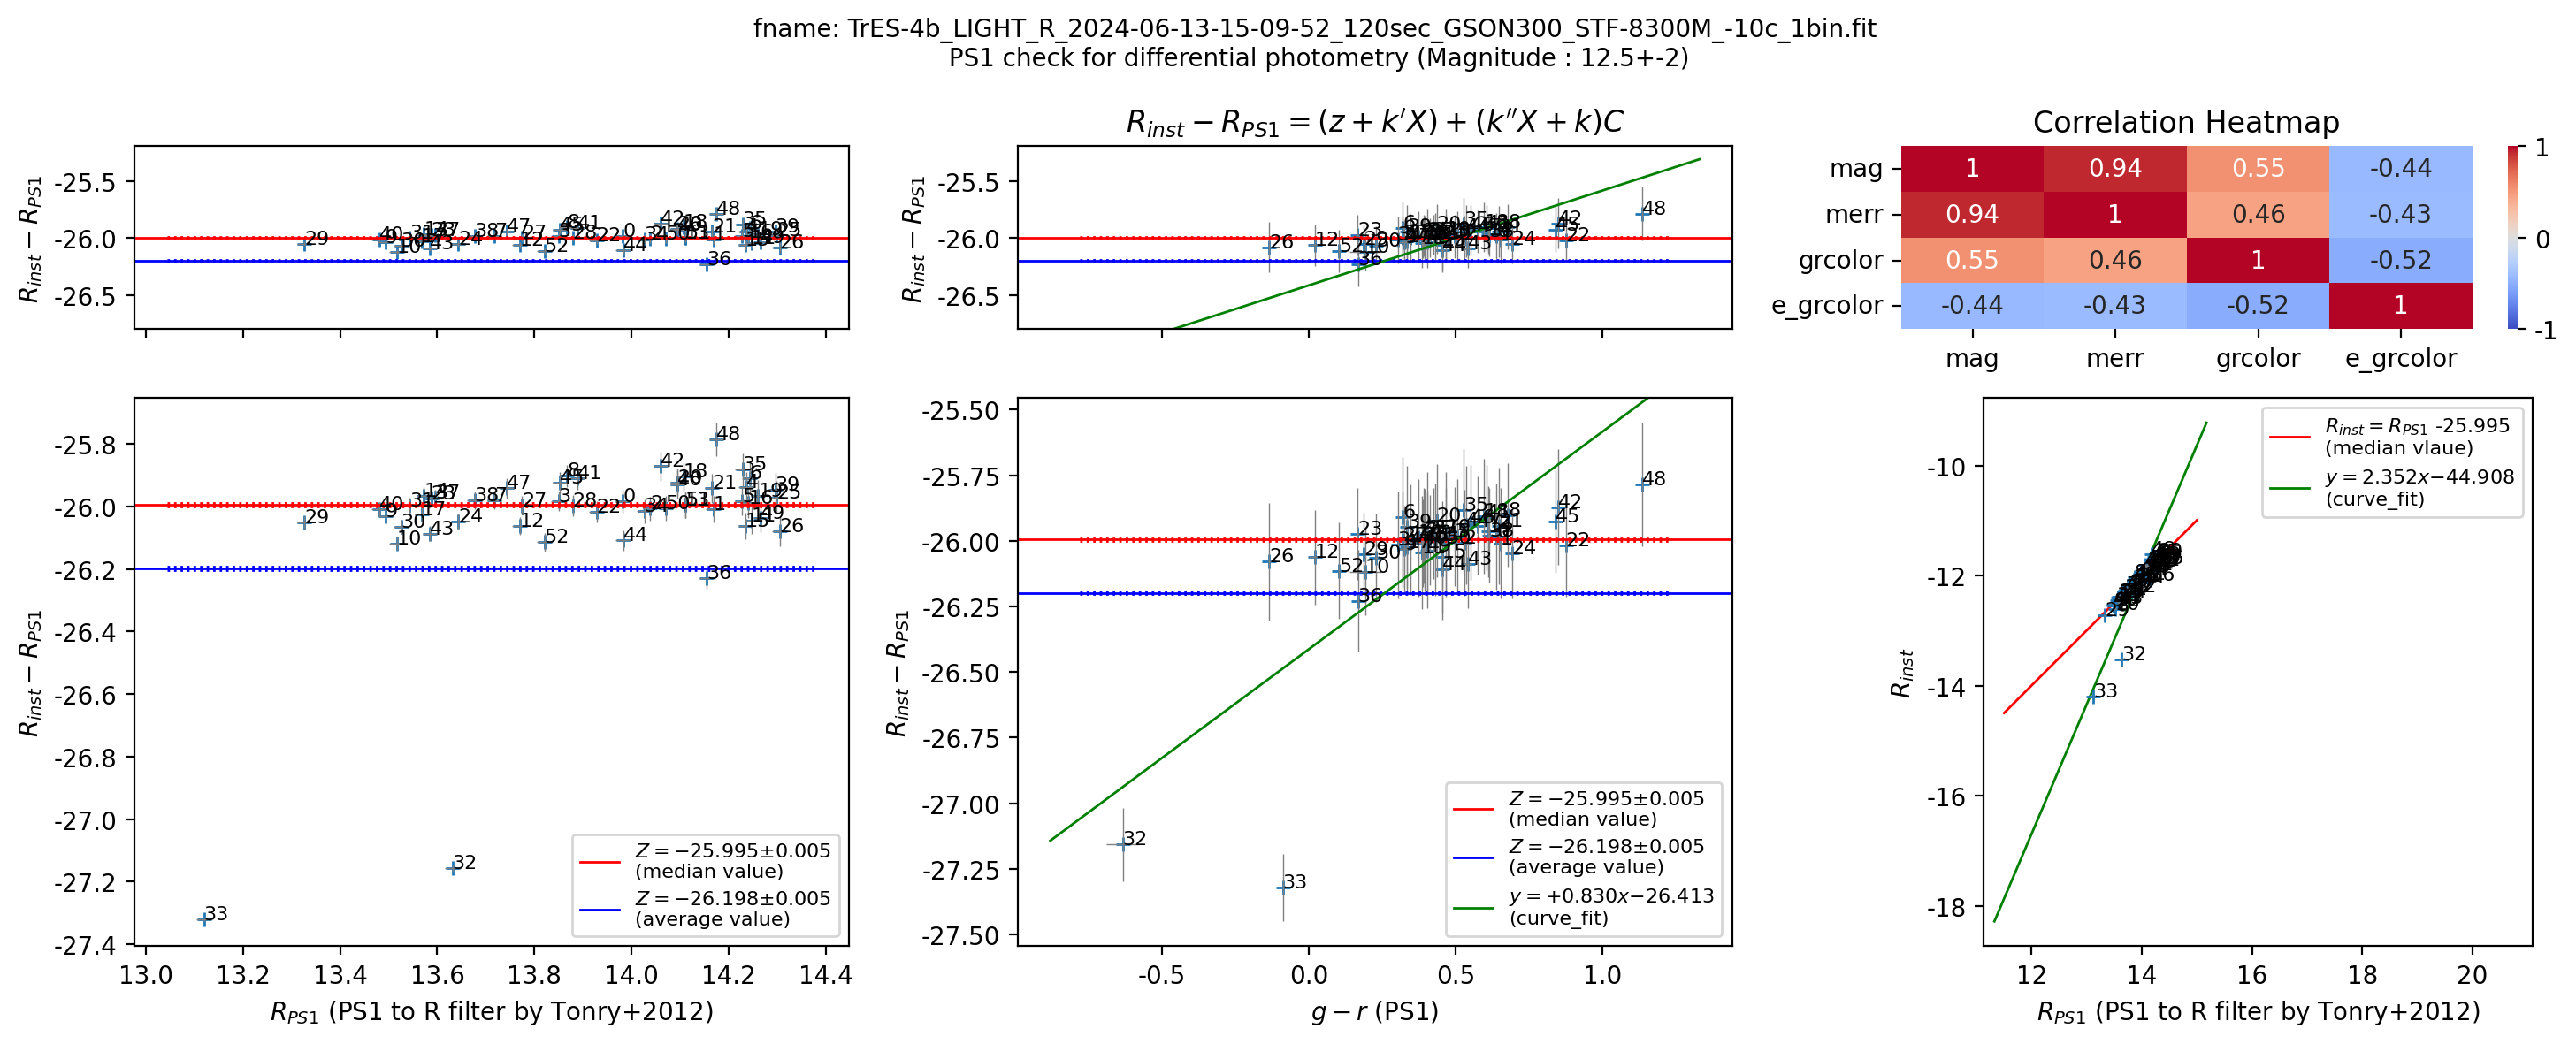

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(15, 6), sharex=False, sharey=False,
        gridspec_kw={'height_ratios': [1, 3]})
errkw = dict(marker="", ls="", ecolor="gray", elinewidth=0.5)

def plot_common(ax, x, y, xerr, yerr, title="", xlabel="", ylabel="", ylim=None):
    ax.plot(x, y, '+')
    ax.errorbar(x, y, xerr=xerr, yerr=yerr, **errkw)
    ax.axhline(zeropt_med, color="r", lw=1, label=f"$Z = {{{zeropt_med:.3f}}} ± {{{dzeropt:.3f}}}$\n(median value)")
    ax.axhline(zeropt_avg, color="b", lw=1, label=f"$Z = {{{zeropt_avg:.3f}}} ± {{{dzeropt:.3f}}}$\n(average value)")
    ax.hlines([zeropt_med + dzeropt, zeropt_med - dzeropt, zeropt_avg + dzeropt, zeropt_avg - dzeropt],
            *ax.get_xlim(), color=["r","r","b","b"], lw=1, ls=":")
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel, ylim=ylim)
    # ax.legend(fontsize=8, loc='best')

# 상단 행
plot_common(axs[0, 0], df_phot_stars_na[f"{flt}mag"], df_phot_stars_na["mag"] - df_phot_stars_na[f"{flt}mag"],
            df_phot_stars_na[f"e_{flt}mag"], df_phot_stars_na["merr"],
            ylabel=f"${{{flt}}}_{{inst}} - {{{flt}}}_{{PS1}}$",
            ylim=(zeropt_med-0.8, zeropt_med+0.8))

plot_common(axs[0, 1], df_phot_stars_na["grcolor"], df_phot_stars_na["mag"] - df_phot_stars_na[f"{flt}mag"],
            df_phot_stars_na[f"e_grcolor"], merr_total2,
            title=f"${{{flt}}}_{{inst}} - {{{flt}}}_{{PS1}} = (z + k'X) + (k''X + k)C$",
            ylabel=f"${{{flt}}}_{{inst}} - {{{flt}}}_{{PS1}}$",
            ylim=(zeropt_med-0.8, zeropt_med+0.8))
axs[0, 1].plot(axs[0, 1].get_xlim(), linf(np.array(axs[0, 1].get_xlim()), *poptc),
            "g-", lw=1, label=f"$y = {{{poptc[1]:+.3f}}}x {{{poptc[0]:+.3f}}}$\n(curve_fit)")
# axs[0, 1].legend(fontsize=8, loc='best')

data = df_phot_stars_na[["mag", "merr", "grcolor", "e_grcolor"]]
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=axs[0, 2])
axs[0, 2].set(title='Correlation Heatmap')

# 하단 행
plot_common(axs[1, 0], df_phot_stars_na[f"{flt}mag"], df_phot_stars_na["mag"] - df_phot_stars_na[f"{flt}mag"],
            df_phot_stars_na[f"e_{flt}mag"], df_phot_stars_na["merr"],
            xlabel=f"${{{flt}}}_{{PS1}}$ (PS1 to {flt} filter by Tonry+2012)",
            ylabel=f"${{{flt}}}_{{inst}} - {{{flt}}}_{{PS1}}$")

plot_common(axs[1, 1], df_phot_stars_na["grcolor"], df_phot_stars_na["mag"] - df_phot_stars_na[f"{flt}mag"],
            df_phot_stars_na[f"e_grcolor"], merr_total2,
            xlabel="$g - r$ (PS1)",
            ylabel=f"${{{flt}}}_{{inst}} - {{{flt}}}_{{PS1}}$")
axs[1, 0].legend(fontsize=8, loc='best')

axs[1, 1].plot(axs[1, 1].get_xlim(), linf(np.array(axs[1, 1].get_xlim()), *poptc),
            "g-", lw=1, label=f"$y = {{{poptc[1]:+.3f}}}x {{{poptc[0]:+.3f}}}$\n(curve_fit)")
axs[1, 1].legend(fontsize=8, loc='best')

axs[1, 2].plot(_xx, _xx + zeropt_med,
            label=f"${{{flt}}}_{{inst}} = {{{flt}}}_{{PS1}}$ {zeropt_med:+.03f}\n(median vlaue)",
            color="r", lw=1, ls="-")
axs[1, 2].plot(axs[1, 2].get_xlim(), linf(np.array(axs[1, 2].get_xlim()), *poptm),
            "g-", lw=1, label=f"$y = {{{poptm[1]:.3f}}}x {{{poptm[0]:+.3f}}}$\n(curve_fit)")
axs[1, 2].plot(df_phot_stars_na[f"{flt}mag"], df_phot_stars_na["mag"], '+')
axs[1, 2].errorbar(df_phot_stars_na[f"{flt}mag"],
            df_phot_stars_na["mag"],
            xerr=df_phot_stars_na[f"e_{flt}mag"],
            yerr=df_phot_stars_na["merr"],
            **errkw)
axs[1, 2].set(
            xlabel=f"${{{flt}}}_{{PS1}}$ (PS1 to {flt} filter by Tonry+2012)",
            ylabel =f"${{{flt}}}_{{inst}}$",
        )
axs[1, 2].legend(fontsize=8, loc='best')
axs[1, 2].axis('square')

# ID 텍스트 추가
for _, row in df_phot_stars_na.iterrows():
    for i in range(2):
        for j in range(2):
            axs[i, j].text(row[f"{flt}mag" if j == 0 else "grcolor"],
                        row["mag"] - row[f"{flt}mag"], int(row["id"]), fontsize=8, clip_on=True)
    axs[1, 2].text(row[f"{flt}mag"], row["mag"], int(row["id"]), fontsize=8, clip_on=True)

# x축 레이블 숨기기 (상단 행)
for ax in axs[0, :2]:
    ax.tick_params(labelbottom=False)

plt.suptitle(f"fname: {fpath.name}\n PS1 check for differential photometry (Magnitude : {Mag_target}+-{Mag_delta})", fontsize=10)
plt.tight_layout()
plt.savefig(f"{BASEPATH / save_dir_name}/{fpath.stem}_standardization_extended.png")

plt.show()

## 모든 별 측광

### 별 찾기

In [ ]:
from astropy.stats import sigma_clipped_stats

FWHM = FWHM_INIT
avg, med, std = sigma_clipped_stats(hdul[0].data)  # by default, 3-sigma 5-iteration.
thresh = 5. * std

from photutils.detection import DAOStarFinder
DAOfind = DAOStarFinder(
                        fwhm = FWHM,
                        threshold=thresh,   # In reality, FWHM must be measured a priori using, e.g., ``ginga``
                        # sharplo=0.2, sharphi=1.0,   # default values 0.2 and 1.0
                        # roundlo=-1.0, roundhi=1.0,  # default values -1 and +1
                        # sigma_radius=1.5,           # default values 1.5
                        # ratio=1.0,                  # 1.0: circular gaussian
                        exclude_border=True         # To exclude sources near edges
                        )

DAOfound = DAOfind(hdul[0].data)
print("len(DAOfound) :",len(DAOfound))
print(DAOfound.colnames)

df_DAO = DAOfound.to_pandas()
print(type(df_DAO))
df_DAO

pos = np.transpose((DAOfound['xcentroid'], DAOfound['ycentroid']))
apert = CAp(pos, r=R_AP)
annul = CAn(positions=pos, r_in= R_IN, r_out=R_OUT)


len(DAOfound) : 561
['id', 'xcentroid', 'ycentroid', 'sharpness', 'roundness1', 'roundness2', 'npix', 'sky', 'peak', 'flux', 'mag']
<class 'pandas.core.frame.DataFrame'>


### tag on image

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(12, 8),
                        subplot_kw={'projection': wcs},
                        sharex=False, sharey=False, gridspec_kw=None)

im = zimshow(axs, hdul[0].data, )
axs.set_title('World coordinate system', fontsize=9)
axs.coords.grid(True, color='white', ls=':')
axs.coords['ra'].set_axislabel('Right Ascension (J2000)', minpad=0.5, fontsize=8)
axs.coords['ra'].set_ticklabel_position('bl')
axs.coords['dec'].set_axislabel('Declination (J2000)', minpad=0.4, fontsize=8)
axs.coords['dec'].set_ticklabel_position('bl')
axs.coords['ra'].set_major_formatter('hh:mm')
axs.coords['dec'].set_major_formatter('dd:mm')
axs.coords['ra'].display_minor_ticks(True)
axs.coords['dec'].display_minor_ticks(True)
axs.coords['ra'].set_minor_frequency(2)
axs.coords['dec'].set_minor_frequency(2)
axs.tick_params(labelsize=8)

annul.plot(axs, color="r")
for i in range(len(pos)):
    axs.text(pos[i][0], pos[i][1], f"Star #{str(i)}", fontsize=6, color='w')

annul.plot(axs, color="r")

cbar = plt.colorbar(im, ax = axs, fraction=0.035, pad=0.04, )
cbar.ax.tick_params(labelsize=8)

axs.set_title(f"fname: {fpath.name}\n Result of DAOFinder", fontsize=10,)

axs.annotate(f'FWHM: {FWHM}', fontsize=8,
    xy=(0, 0), xytext=(-10, -30), va='top', ha='left',
    xycoords='axes fraction', textcoords='offset points')

axs.annotate(f'Sky threshold: {thresh:.02f}', fontsize=8,
    xy=(0, 0), xytext=(-10, -40), va='top', ha='left',
    xycoords='axes fraction', textcoords='offset points')

axs.annotate(f'Number of star(s): {len(DAOfound)}', fontsize=8,
    xy=(0, 0), xytext=(-10, -50), va='top', ha='left',
    xycoords='axes fraction', textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{save_dir_name}/{fpath.stem}_DAOStarfinder_fwhm_{FWHM}.png")

plt.show()

### sky estimation

In [ ]:
import numpy as np
from astropy.stats import sigma_clip

def sky_fit(all_sky, method='mode', sky_nsigma=3, sky_iter=5, \
            mode_option='sex', med_factor=2.5, mean_factor=1.5):
    '''
    Estimate sky from given sky values.
    Parameters
    ----------
    all_sky : ~numpy.ndarray
        The sky values as numpy ndarray format. It MUST be 1-d for proper use.
    method : {"mean", "median", "mode"}, optional
        The method to estimate sky value. You can give options to "mode"
        case; see mode_option.
        "mode" is analogous to Mode Estimator Background of photutils.
    sky_nsigma : float, optinal
        The input parameter for sky sigma clipping.
    sky_iter : float, optinal
        The input parameter for sky sigma clipping.
    mode_option : {"sex", "IRAF", "MMM"}, optional.
        sex  == (med_factor, mean_factor) = (2.5, 1.5)
        IRAF == (med_factor, mean_factor) = (3, 2)
        MMM  == (med_factor, mean_factor) = (3, 2)
    Returns
    -------
    sky : float
        The estimated sky value within the all_sky data, after sigma clipping.
    std : float
        The sample standard deviation of sky value within the all_sky data,
        after sigma clipping.
    nsky : int
        The number of pixels which were used for sky estimation after the
        sigma clipping.
    nrej : int
        The number of pixels which are rejected after sigma clipping.
    -------
    '''
    sky = all_sky.copy()
    if method == 'mean':
        return np.mean(sky), np.std(sky, ddof=1)

    elif method == 'median':
        return np.median(sky), np.std(sky, ddof=1)

    elif method == 'mode':
        sky_clip   = sigma_clip(sky, sigma=sky_nsigma,
                                maxiters=sky_iter, #iters=sky_iter,
                                )
        sky_clipped= sky[np.invert(sky_clip.mask)]
        nsky       = np.count_nonzero(sky_clipped)
        mean       = np.mean(sky_clipped)
        med        = np.median(sky_clipped)
        std        = np.std(sky_clipped, ddof=1)
        nrej       = len(all_sky) - len(sky_clipped)

        if nrej < 0:
            raise ValueError('nrej < 0: check the code')

        if nrej > nsky: # rejected > survived
            raise Warning('More than half of the pixels rejected.')

        if mode_option == 'IRAF':
            if (mean < med):
                sky = mean
            else:
                sky = 3 * med - 2 * mean

        elif mode_option == 'MMM':
            sky = 3 * med - 2 * mean

        elif mode_option == 'sex':
            if (mean - med) / std > 0.3:
                sky = med
            else:
                sky = (2.5 * med) - (1.5 * mean)
        else:
            raise ValueError('mode_option not understood')

        return sky, std, nsky, nrej

### 측광 수행하여 결과 저장하기

In [ ]:
def mag_inst(flux, ferr):
    m_inst = -2.5 * np.log10(flux)
    merr   = 2.5/ np.log(10) * ferr / flux
    return m_inst, merr

from photutils.aperture import aperture_photometry as apphot

apphot_result = apphot(hdul[0].data, apert, method='center')
print(type(apphot_result))
# df_apphot = pd.DataFrame()
# apphot_result
df_apphot = apphot_result.to_pandas()
print(type(df_apphot))
df_apphot

ap_area  = apert.area
ap_area

# since our `annul` has many elements,
mask_apert = (apert.to_mask(method='center'))
mask_annul = (annul.to_mask(method='center'))

mag_ann  = np.zeros(len(apphot_result))
merr_ann = np.zeros(len(apphot_result))

In [ ]:
for i in range(len(apphot_result)):
    annul_weighted = mask_annul[i].multiply(hdul[0].data)
    sky_non0   = np.nonzero(annul_weighted)
    sky_pixel  = annul_weighted[sky_non0]

    msky, sky_std, nsky, nrej = sky_fit(sky_pixel, method='mode',
                                                        mode_option='sex')


    flux_star = apphot_result['aperture_sum'][i] - msky * ap_area  # total - sky

    flux_err  = np.sqrt(apphot_result['aperture_sum'][i] * gain    # Poissonian (star + sky)
                        + ap_area * rdnoise**2 # Gaussian
                        + (ap_area * (gain * sky_std))**2 / nsky )

    mag_ann[i], merr_ann[i] = mag_inst(flux_star, flux_err)
    df_apphot.at[i, 'msky'] = msky
    df_apphot.at[i, 'sky_std'] = sky_std
    df_apphot.at[i, 'nsky'] = nsky
    df_apphot.at[i, 'nrej'] = nrej
    df_apphot.at[i, 'flux_star'] = flux_star
    df_apphot.at[i, 'flux_err'] = flux_err
    df_apphot.at[i, 'mag_ann'] = mag_ann[i]
    df_apphot.at[i, 'merr_ann'] = merr_ann[i]

df_apphot['filename'] = fpath.stem
df_apphot['t_start'] = t_start
df_apphot['t_expos'] = t_expos
df_apphot['t_middle'] = t_middle
df_apphot['filter'] = flt
df_apphot["zeropt_med"] = zeropt_med
df_apphot["zeropt_avg"] = zeropt_avg
df_apphot["e_zeropt"] = dzeropt

df_apphot[f"{flt}_magnitude"] = df_apphot["mag_ann"] - df_apphot["zeropt_med"]

sky_coord = wcs.pixel_to_world(df_apphot['xcenter'], df_apphot['ycenter'])
sky_coord
print(type(sky_coord))

df_RADEC = pd.DataFrame({"RAJ2000": sky_coord.ra.degree, "DEJ2000": sky_coord.dec.degree})
df_apphot = pd.concat([df_apphot, df_RADEC], axis=1,)

df_apphot['filename'] = fpath.stem
df_apphot['t_start'] = t_start
df_apphot['t_expos'] = t_expos
df_apphot['t_middle'] = t_middle
df_apphot['filter'] = flt
df_apphot["zeropt_med"] = zeropt_med
df_apphot["zeropt_avg"] = zeropt_avg
df_apphot["e_zeropt"] = dzeropt
df_apphot[f"{flt}_magnitude"] = df_apphot["mag_ann"] - df_apphot["zeropt_med"]

df_apphot.to_csv(f"{save_dir_name}/{fpath.stem}_result_photometry.csv")

###(과제)

df_apphot에 들어 있는 각 컬럼의 데이터는 무엇인지 그 설명을 쓰시오. (아래에 이어서 작성하시오.)


* id : 별의 id  
* xcenter : 별의 픽셀 좌표 x
* ycenter : 별의 픽셀 좌표 y    float64
* aperture_sum : 구경 안의 픽셀 값의 합 (starlight + skylight)
*  
*


In [ ]:
print(df_apphot.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            561 non-null    int64  
 1   xcenter       561 non-null    float64
 2   ycenter       561 non-null    float64
 3   aperture_sum  561 non-null    float64
 4   msky          561 non-null    float64
 5   sky_std       561 non-null    float64
 6   nsky          561 non-null    float64
 7   nrej          561 non-null    float64
 8   flux_star     561 non-null    float64
 9   flux_err      561 non-null    float64
 10  mag_ann       540 non-null    float64
 11  merr_ann      561 non-null    float64
 12  filename      561 non-null    object 
 13  t_start       561 non-null    object 
 14  t_expos       561 non-null    float64
 15  t_middle      561 non-null    object 
 16  filter        561 non-null    object 
 17  zeropt_med    561 non-null    float64
 18  zeropt_avg    561 non-null    

### 측광 결과 분석

In [ ]:
df_apphot_sub = df_apphot.dropna()
df_apphot_sub

fig, axs = plt.subplots(2, 2, figsize=(10, 8),
                        sharex=False, sharey=False, gridspec_kw=None)

for idx, row in df_apphot_sub.iterrows():
    im0 = axs[0, 0].errorbar(df_apphot_sub["id"],
                df_apphot_sub[f"{flt}_magnitude"], yerr=df_apphot_sub["merr_ann"],
                marker='x',
                ls='none',
                #ms=10,
                capsize=3)

axs[0, 0].invert_yaxis()
axs[0, 0].set(
    xlabel='Star ID',
    ylabel=f"${{{flt}}}_{{obs}}$"
    )

style = {'edgecolor': 'white', 'linewidth': 3}
im1 = axs[0, 1].hist(df_apphot_sub[f"{flt}_magnitude"],
            **style)
axs[0, 1].set(
    xlabel=f"${{{flt}}}_{{obs}}$",
    ylabel="number of stars"
    )

# 상관관계 계산
data =  df_apphot_sub[[f"{flt}_magnitude", "merr_ann"]]
corr = data.corr()

# 히트맵 그리기
im2 = sns.heatmap(corr, annot=True, cmap='coolwarm',
                    vmin=-1, vmax=1, center=0, ax = axs[1, 0])
axs[1, 0].set(
    title = 'Correlation Heatmap',
    )

axs[1, 1].scatter(df_apphot_sub[f"{flt}_magnitude"], df_apphot_sub["merr_ann"], marker='x',)
axs[1, 1].errorbar(x=df_apphot_sub[f"{flt}_magnitude"], y=df_apphot_sub["merr_ann"],
            yerr=None, xerr=df_apphot_sub["merr_ann"], fmt="o", color="gray", capsize=3, alpha=0.5)
axs[1, 1].set(
    title = "Correlation between Magnitude and Error",
    xlabel=f"${{{flt}}}_{{obs}}$",
    ylabel="Error",
    )

plt.suptitle(f"fname: {fpath.name}\n Result of differential photometry (Magnitude : {Mag_target}+-{Mag_delta})", fontsize=10,)

plt.tight_layout()
plt.savefig(f"{save_dir_name}/{fpath.stem}_Result_of_differential_photometry.png")

plt.show()
# plt.close()